Проект по НИС, "Investment Activity in a Crisis"

In [1]:
#импортируем все необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#устанавливаем стиль и шрифт для графиков
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

#игнорируем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
#считываем данные из датасета
train = pd.read_excel('JSTdatasetR6.xlsx')
train

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,...,-0.070045,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,...,0.041654,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,AUS,193,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,...,0.108945,0.062997,NaN,NaN,NaN,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,AUS,193,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,...,0.083086,0.064484,NaN,NaN,NaN,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,AUS,193,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,...,0.119389,0.063503,NaN,NaN,NaN,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,USA,111,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,...,0.014868,0.021309,NaN,NaN,NaN,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,USA,111,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,...,0.170363,0.019363,NaN,NaN,NaN,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,USA,111,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,...,0.121093,0.018716,NaN,NaN,NaN,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,USA,111,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,...,0.061144,0.019312,NaN,NaN,NaN,0.021442,0.020492,0.080606,0.084776,0.070134


In [3]:
#теперь начнем преобразовывать таблицу для большей наглядности

#удалим столбец "iso", потому что вся необходимая информация о стране содержится в столбце "country"
#также удалим столбцы с очень маленьким количеством значений в них, так как они не репрезентативны
train = train.drop(columns = ['iso', 'eq_capgain_interp', 'eq_tr_interp', 'eq_dp_interp', 'rent_ipolated', 'housing_capgain_ipolated', 'crisisJST_old'])
train

,year,country,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,193,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,2.708333,...,NaN,NaN,NaN,-0.070045,0.071417,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,193,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,2.666667,...,-0.045456,NaN,NaN,0.041654,0.065466,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,193,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,2.541667,...,0.031747,NaN,NaN,0.108945,0.062997,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,193,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,2.541667,...,-0.030770,NaN,NaN,0.083086,0.064484,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,193,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,2.666667,...,0.206350,NaN,NaN,0.119389,0.063503,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,111,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,178.575038,...,0.058300,0.049627,0.046894,0.014868,0.021309,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,111,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,182.415361,...,0.064388,0.048682,0.045737,0.170363,0.019363,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,111,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,186.862052,...,0.065539,0.047392,0.044477,0.121093,0.018716,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,111,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,190.247600,...,0.043160,0.046125,0.044217,0.061144,0.019312,0.021442,0.020492,0.080606,0.084776,0.070134


In [4]:
#также заметим, что данных для Ирландии очень мало, поэтому тоже удалим ее из нашего датафрейма
train = train[train['country'] != 'Ireland']
train

,year,country,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,193,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,2.708333,...,NaN,NaN,NaN,-0.070045,0.071417,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,193,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,2.666667,...,-0.045456,NaN,NaN,0.041654,0.065466,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,193,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,2.541667,...,0.031747,NaN,NaN,0.108945,0.062997,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,193,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,2.541667,...,-0.030770,NaN,NaN,0.083086,0.064484,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,193,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,2.666667,...,0.206350,NaN,NaN,0.119389,0.063503,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,111,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,178.575038,...,0.058300,0.049627,0.046894,0.014868,0.021309,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,111,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,182.415361,...,0.064388,0.048682,0.045737,0.170363,0.019363,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,111,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,186.862052,...,0.065539,0.047392,0.044477,0.121093,0.018716,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,111,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,190.247600,...,0.043160,0.046125,0.044217,0.061144,0.019312,0.021442,0.020492,0.080606,0.084776,0.070134


In [5]:
#округлим все значения до двух знаком после запятой для большей читаемости
train = train.round(2)
train

,year,country,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,193,1775.00,3273.24,13.84,21.45,208.78,0.11,2.71,...,NaN,NaN,NaN,-0.07,0.07,0.05,0.07,NaN,NaN,NaN
1,1871,Australia,193,1675.00,3298.51,13.94,19.93,211.56,0.10,2.67,...,-0.05,NaN,NaN,0.04,0.07,0.05,0.07,NaN,NaN,NaN
2,1872,Australia,193,1722.00,3553.43,15.04,21.09,227.40,0.13,2.54,...,0.03,NaN,NaN,0.11,0.06,0.05,0.07,NaN,NaN,NaN
3,1873,Australia,193,1769.00,3823.63,16.22,23.25,266.54,0.12,2.54,...,-0.03,NaN,NaN,0.08,0.06,0.05,0.07,NaN,NaN,NaN
4,1874,Australia,193,1822.00,3834.80,16.27,23.46,287.58,0.14,2.67,...,0.21,NaN,NaN,0.12,0.06,0.05,0.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,111,322701.25,33012.77,108.76,108.05,18695.10,0.20,178.58,...,0.06,0.05,0.05,0.01,0.02,0.02,0.02,0.05,0.07,0.00
2714,2017,USA,111,324756.94,33543.68,110.59,109.98,19479.60,0.20,182.42,...,0.06,0.05,0.05,0.17,0.02,0.02,0.02,0.12,0.16,0.02
2715,2018,USA,111,326497.13,34338.77,113.31,112.57,20527.20,0.21,186.86,...,0.07,0.05,0.04,0.12,0.02,0.03,0.02,0.09,0.13,0.00
2716,2019,USA,111,328018.68,34961.84,115.23,114.51,21372.60,0.21,190.25,...,0.04,0.05,0.04,0.06,0.02,0.02,0.02,0.08,0.08,0.07


In [6]:
#посмотрим описание таблички
train.describe()

,year,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
count,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2478.000000,2.542000e+03,2347.000000,2567.000000,2.406000e+03,...,2045.000000,1909.000000,1921.000000,2.170000e+03,2169.000000,2381.000000,2163.000000,1830.000000,1854.000000,2247.000000
mean,1945.000000,146.588235,32531.692423,9034.462384,39.769926,41.844479,2.548826e+06,0.187806,41.262762,-4.725991e+04,...,0.060895,0.054327,0.051910,1.167935e+06,0.040798,0.054406,0.042797,0.099273,0.111467,0.051638
std,43.597482,23.738588,46443.209392,7810.134286,33.834475,32.326118,1.646002e+07,0.064087,56.495923,7.801056e+05,...,0.148394,0.020749,0.020293,5.440622e+07,0.017258,0.031518,0.017932,0.090395,0.110370,0.048322
min,1870.000000,111.000000,1675.000000,737.380000,3.260000,4.070000,0.000000e+00,0.020000,0.000000,-1.687900e+07,...,-0.310000,0.000000,0.000000,-8.800000e-01,0.000000,-0.040000,0.000000,-0.230000,-0.240000,-0.150000
25%,1907.000000,132.000000,5134.795000,2821.940000,12.690000,15.392500,3.793000e+01,0.140000,2.410000,-5.887500e+01,...,0.000000,0.040000,0.040000,-5.750000e-02,0.030000,0.040000,0.030000,0.050000,0.050000,0.020000
50%,1945.000000,142.000000,10750.840000,5429.510000,22.900000,27.570000,1.800275e+03,0.190000,10.460000,-2.500000e-02,...,0.050000,0.050000,0.050000,4.000000e-02,0.040000,0.050000,0.040000,0.090000,0.100000,0.040000
75%,1983.000000,158.000000,46061.500000,14523.570000,65.950000,68.602500,5.048390e+04,0.230000,73.585000,1.780000e+01,...,0.100000,0.070000,0.060000,1.600000e-01,0.050000,0.060000,0.050000,0.140000,0.160000,0.070000
max,2020.000000,193.000000,329239.720000,34961.840000,122.710000,120.430000,2.070466e+08,0.390000,226.830000,5.885998e+06,...,2.880000,0.130000,0.130000,2.534419e+09,0.130000,0.240000,0.140000,1.140000,1.280000,0.410000


In [7]:
unique_values = train['country'].unique()
print(len(unique_values))
print(unique_values)

17
['Australia' 'Belgium' 'Canada' 'Switzerland' 'Germany' 'Denmark' 'Spain'
 'Finland' 'France' 'UK' 'Italy' 'Japan' 'Netherlands' 'Norway' 'Portugal'
 'Sweden' 'USA']


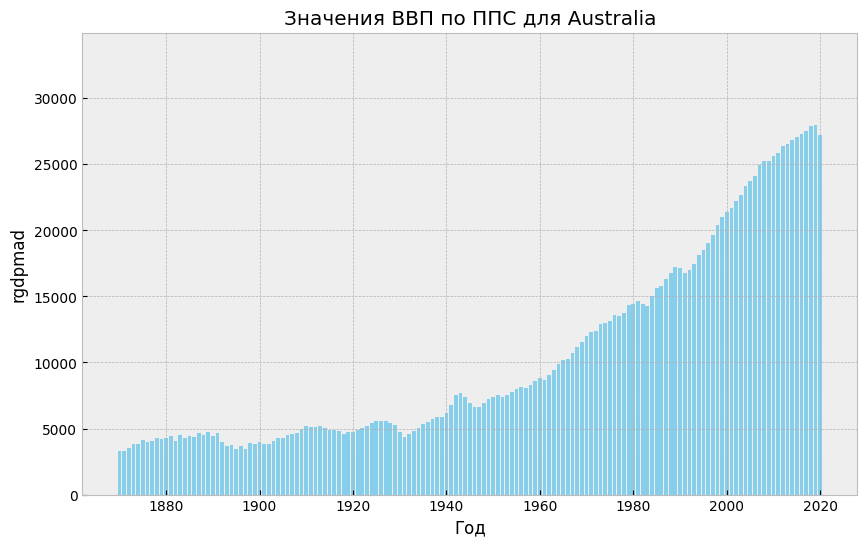

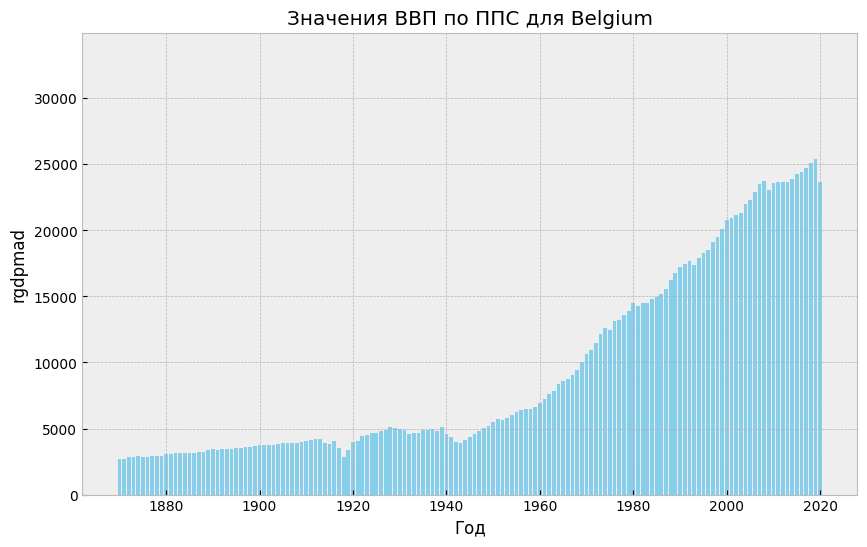

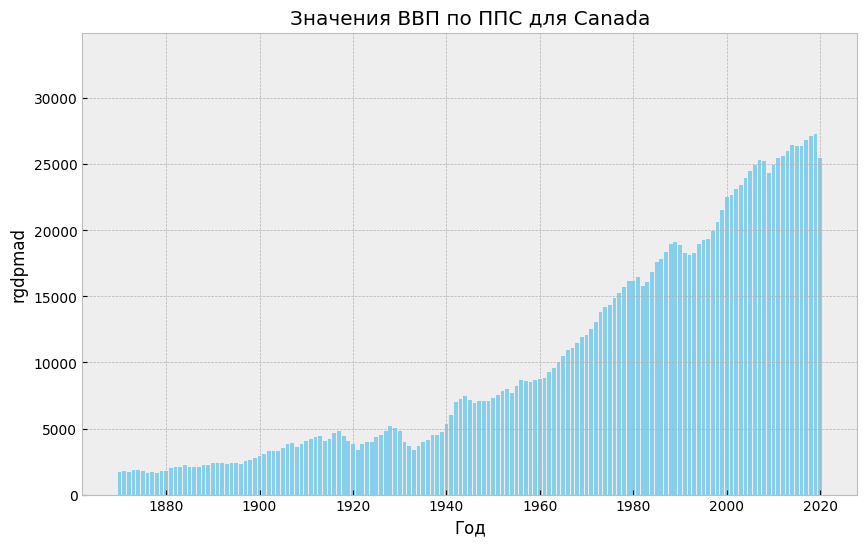

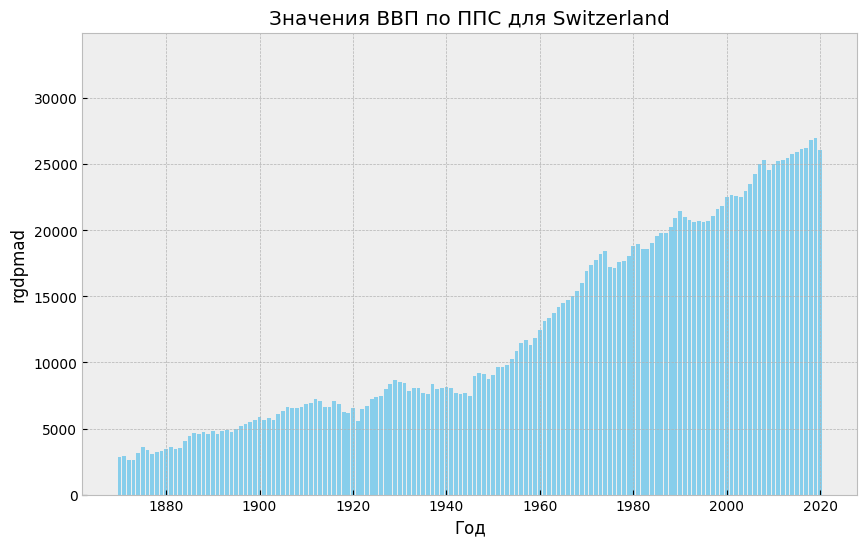

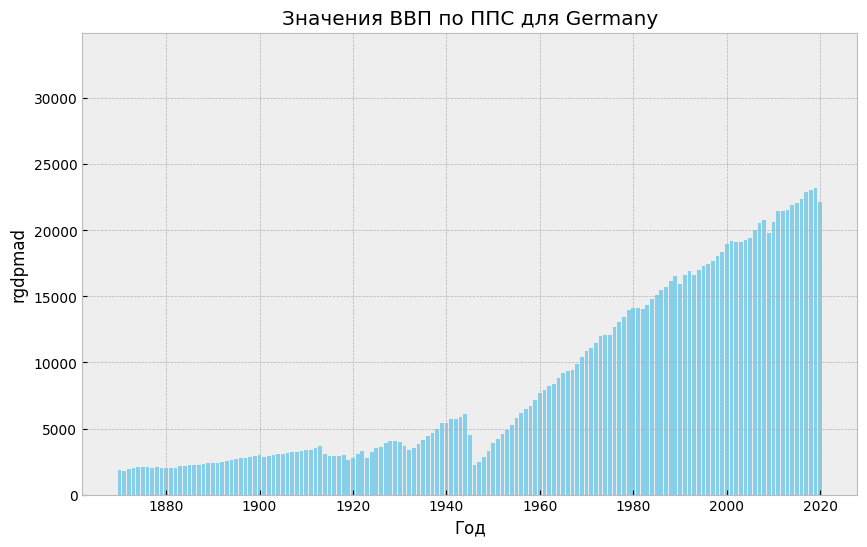

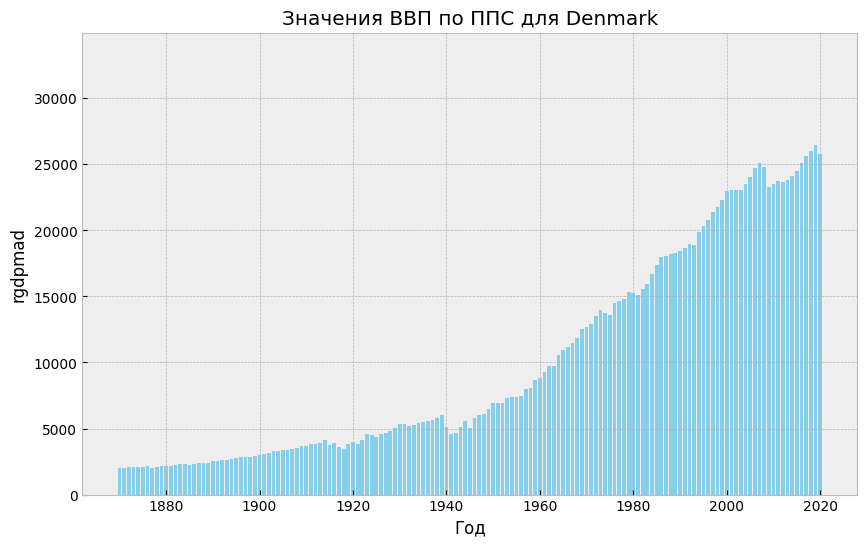

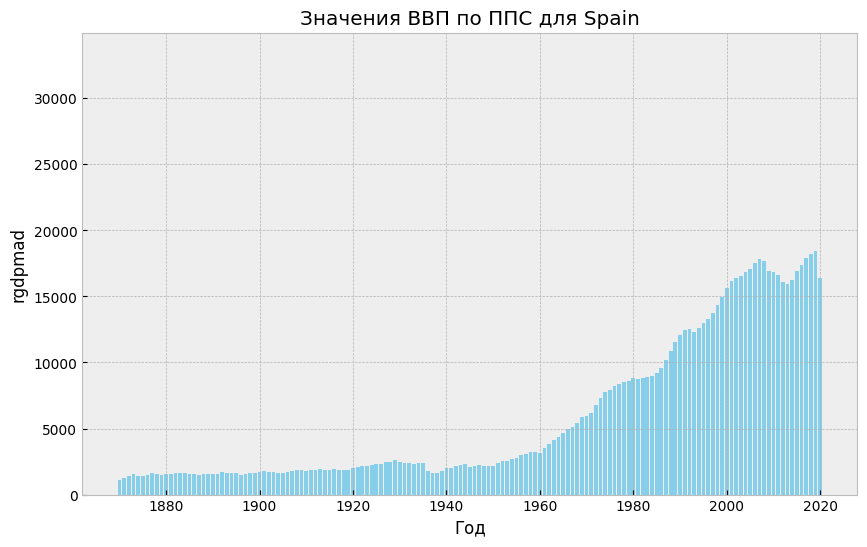

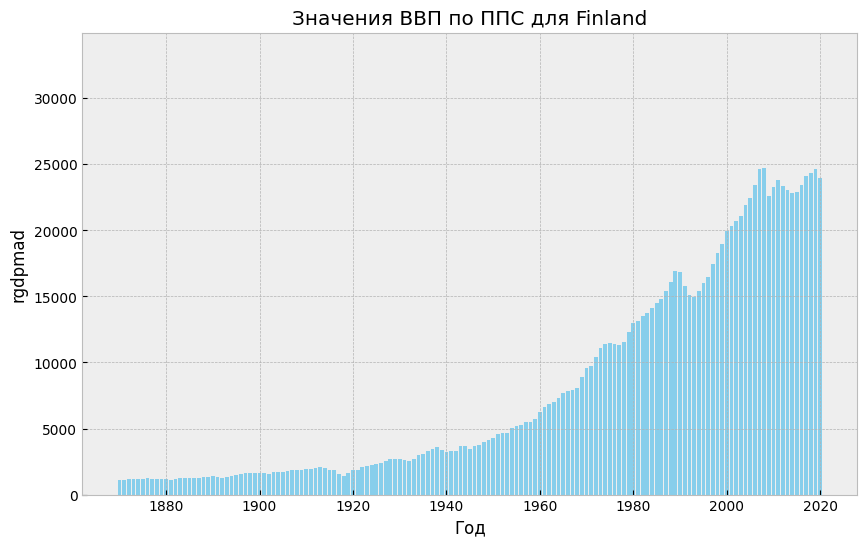

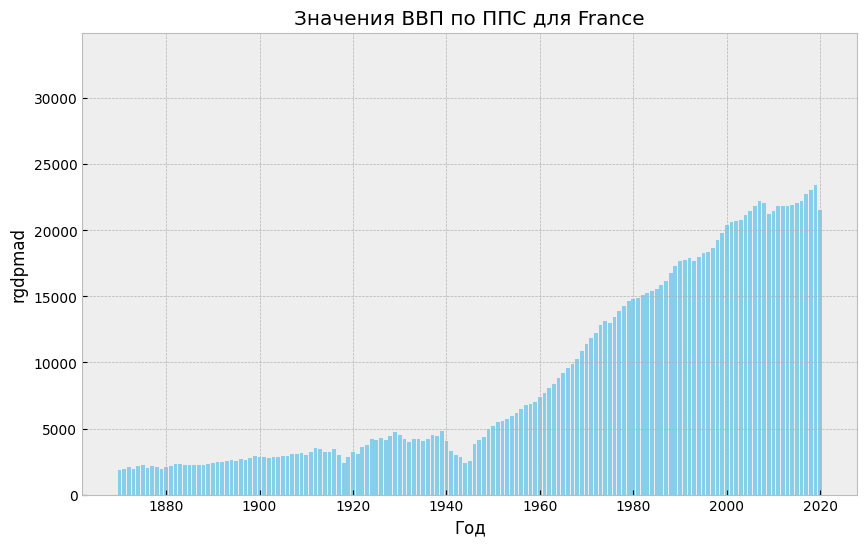

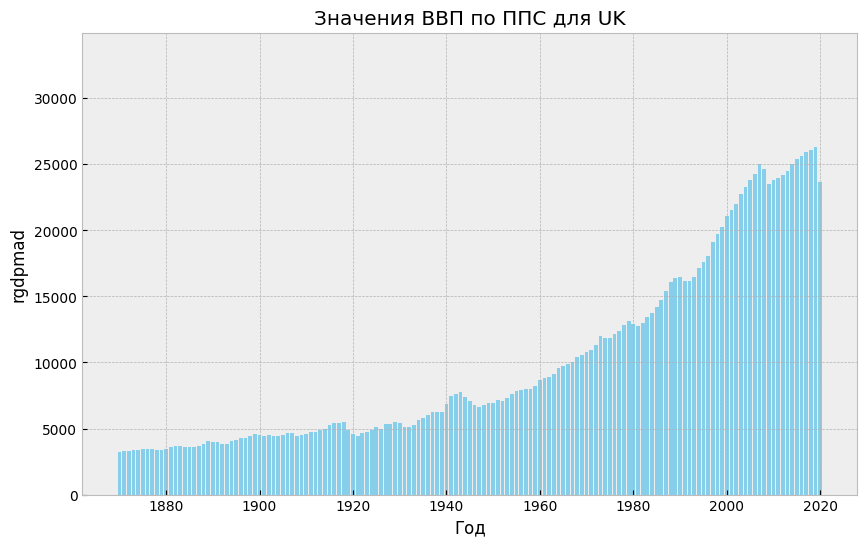

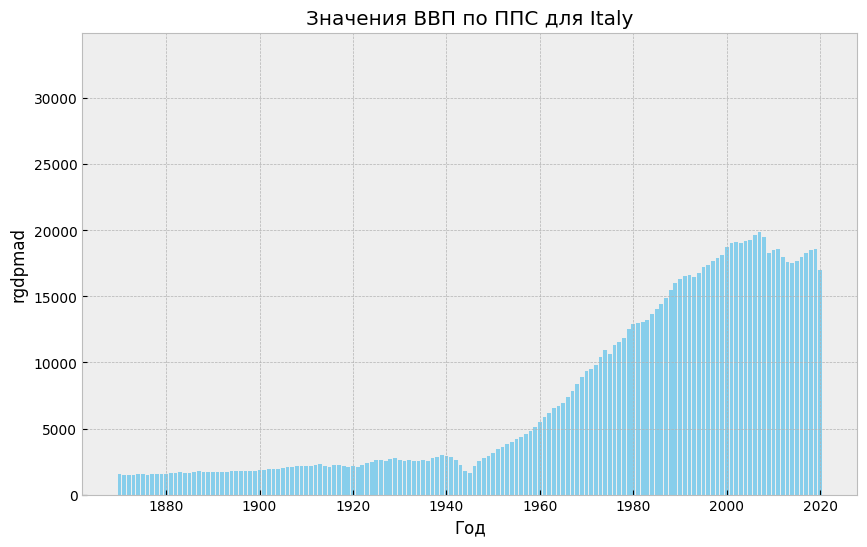

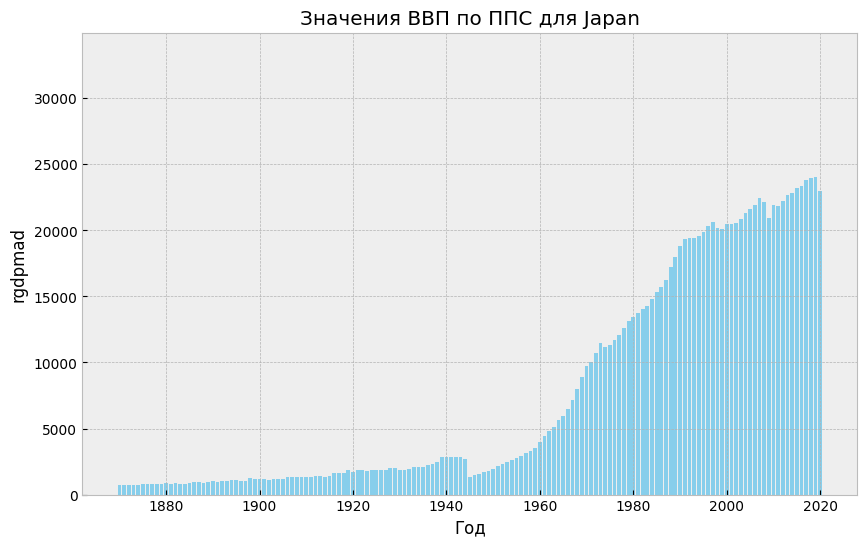

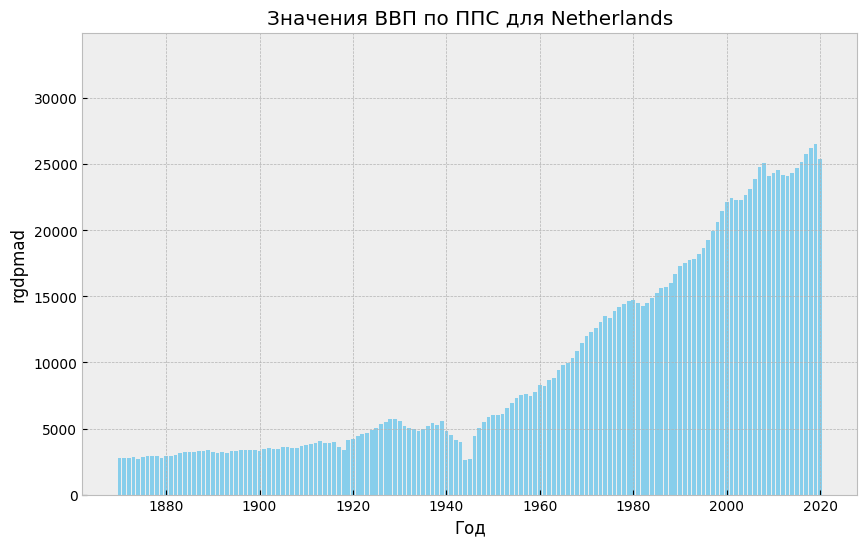

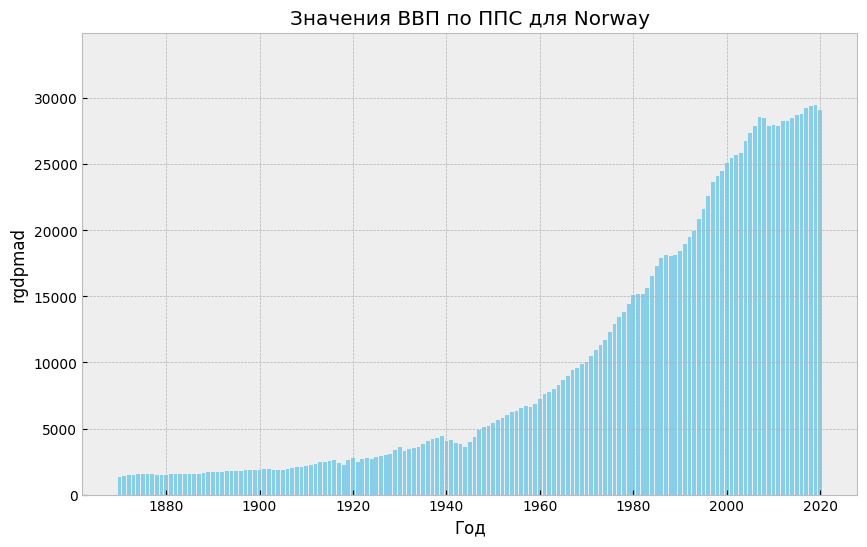

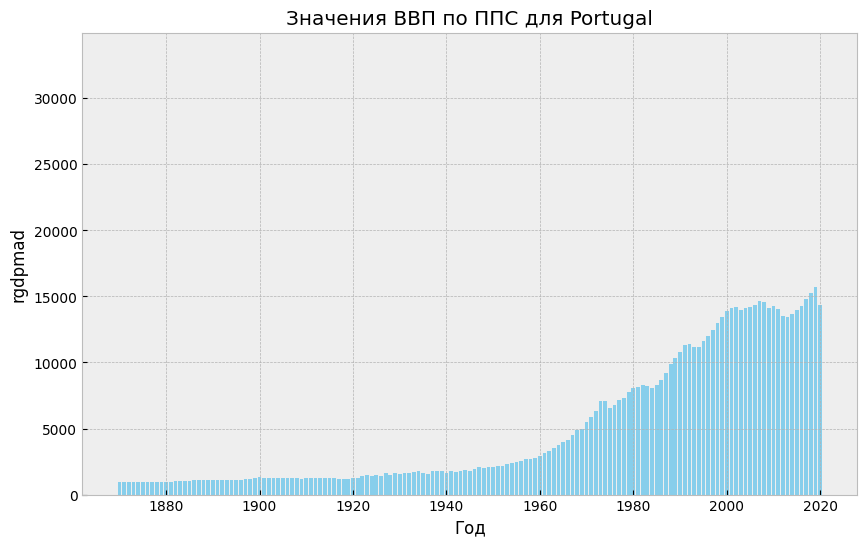

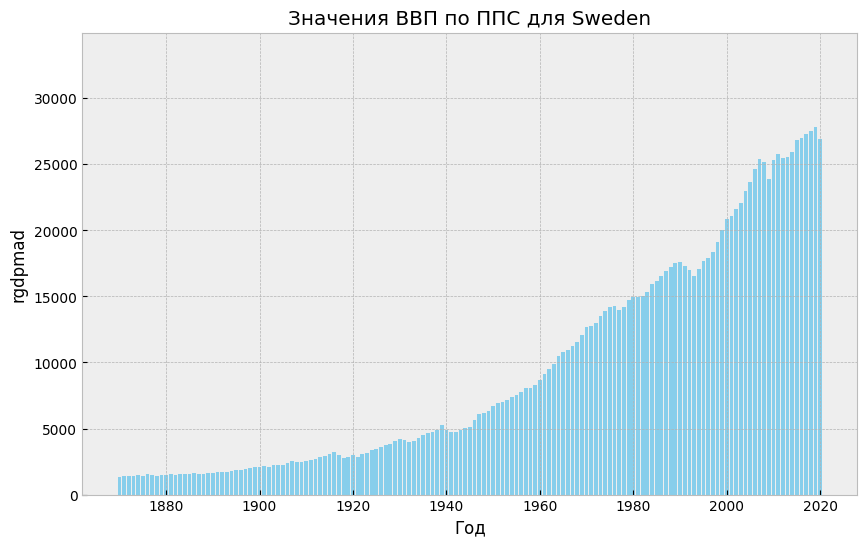

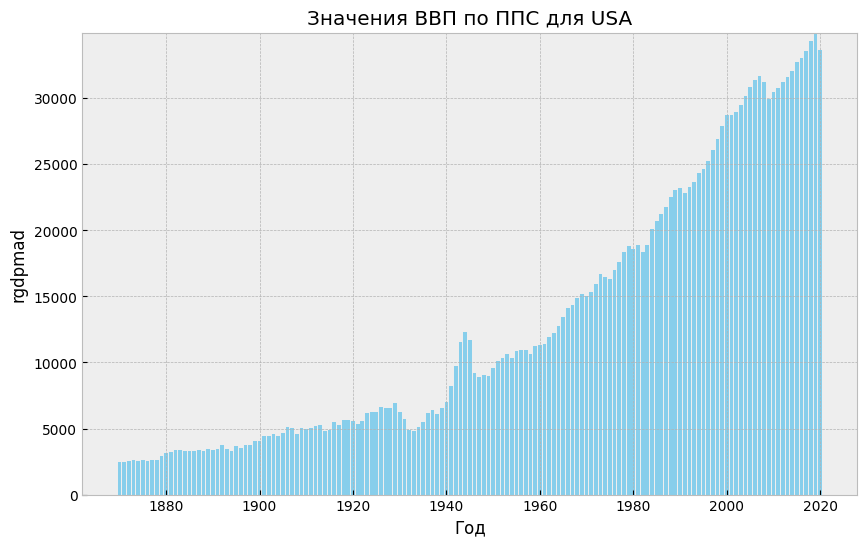

In [8]:
#нарисуем графики-бары для каждой страны
#по оси икс расположены года, по оси игрек значением ВВП на душу населения по паритету покупательной способности
for i in unique_values:
  selected_country = i
  df_selected = train[train['country'] == selected_country]


  plt.figure(figsize=(10, 6))
  plt.bar(df_selected['year'], df_selected['rgdpmad'], color='skyblue')
  plt.xlabel('Год')
  plt.ylabel('rgdpmad')
  plt.title(f'Значения ВВП по ППС для {selected_country}')
  plt.ylim(0, train['rgdpmad'].max()) #делаем так чтобы масштаб по оси ординат был одинаковым для всех графиков
  plt.show()

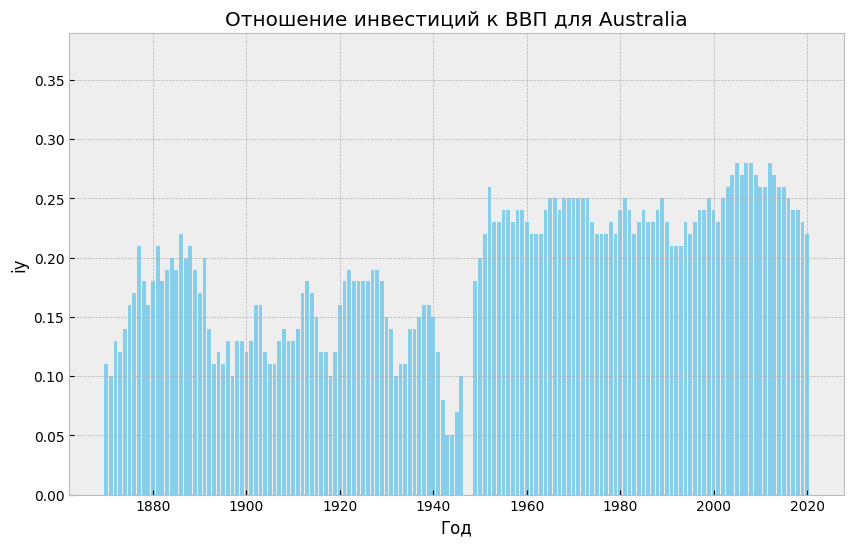

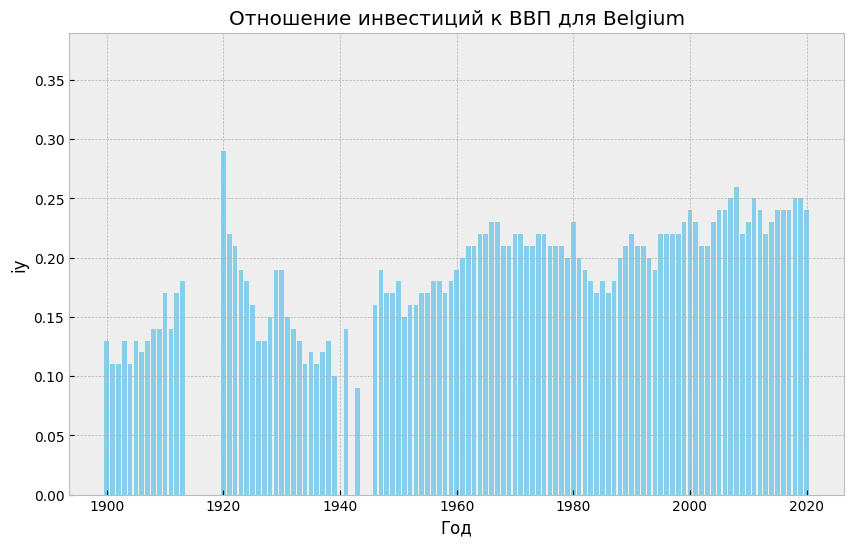

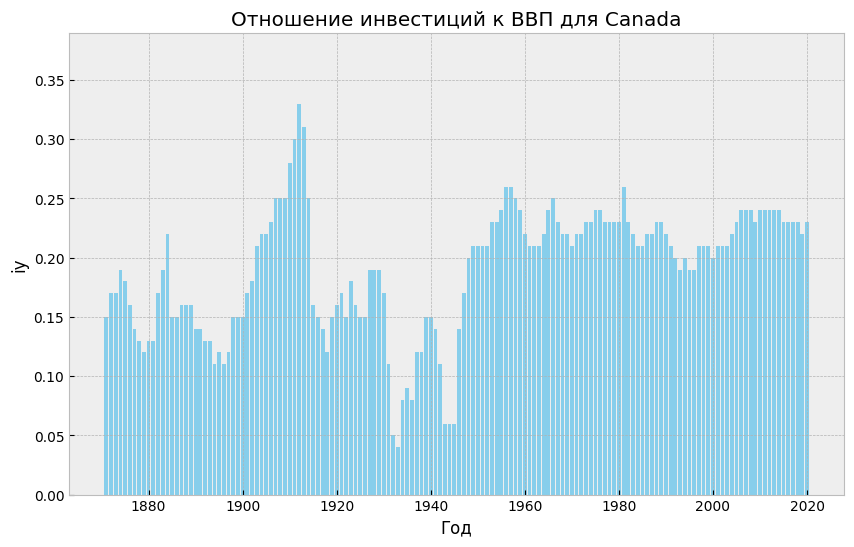

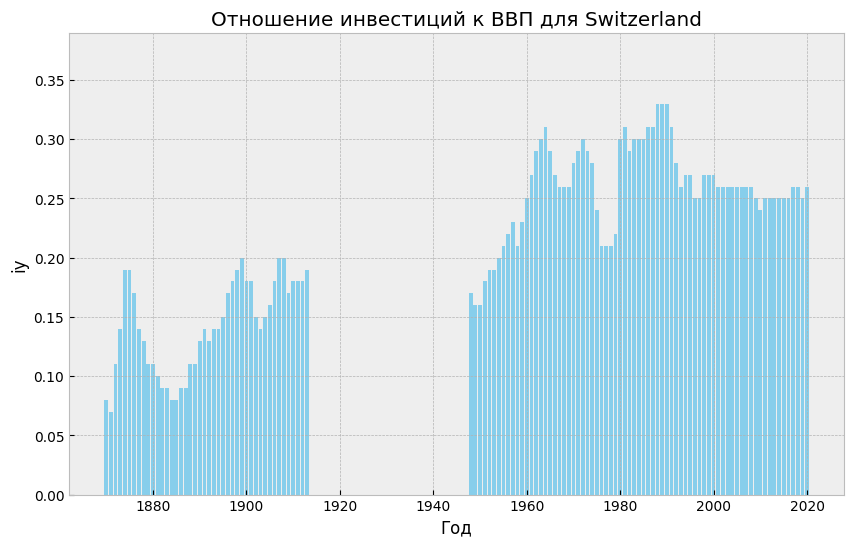

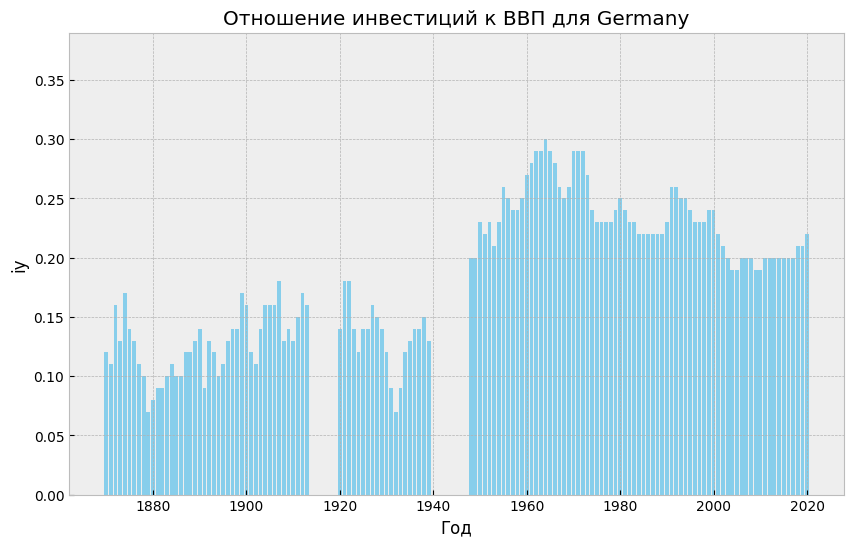

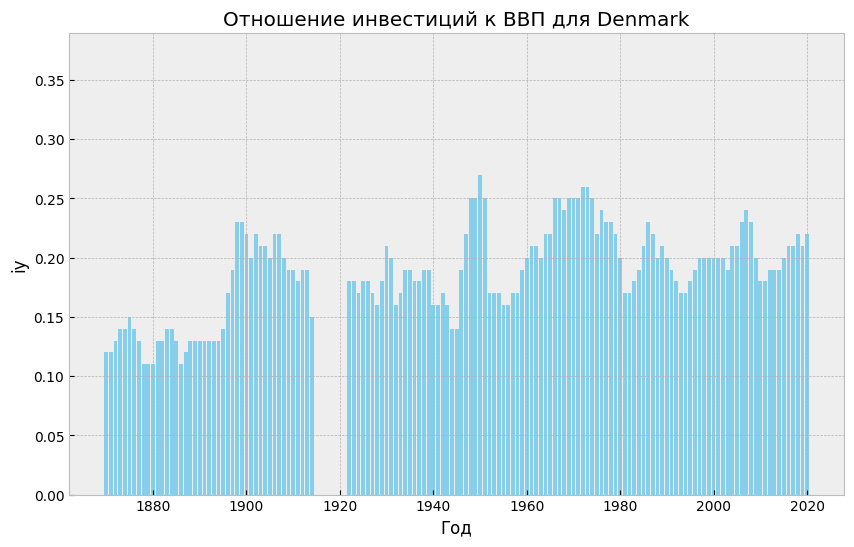

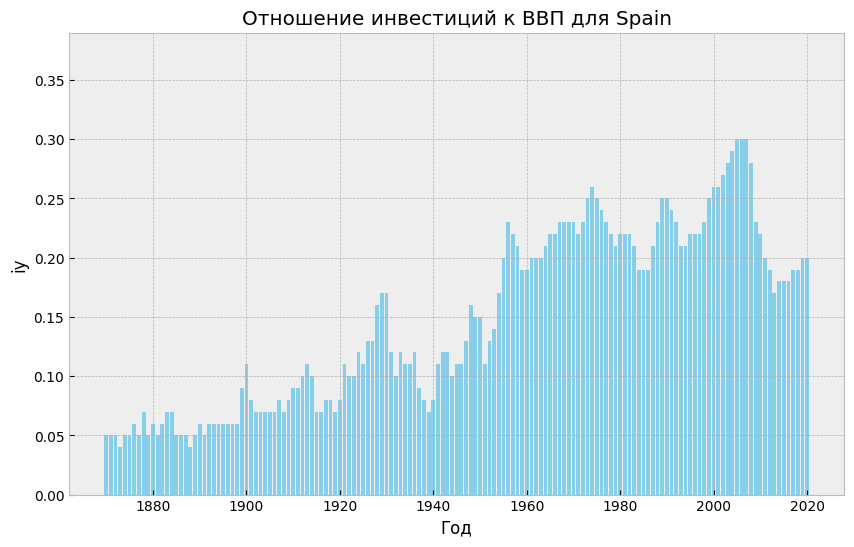

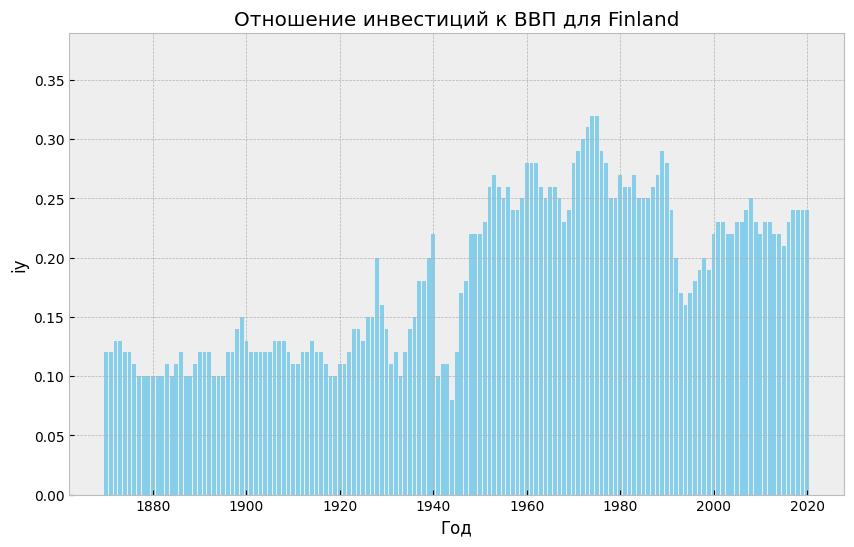

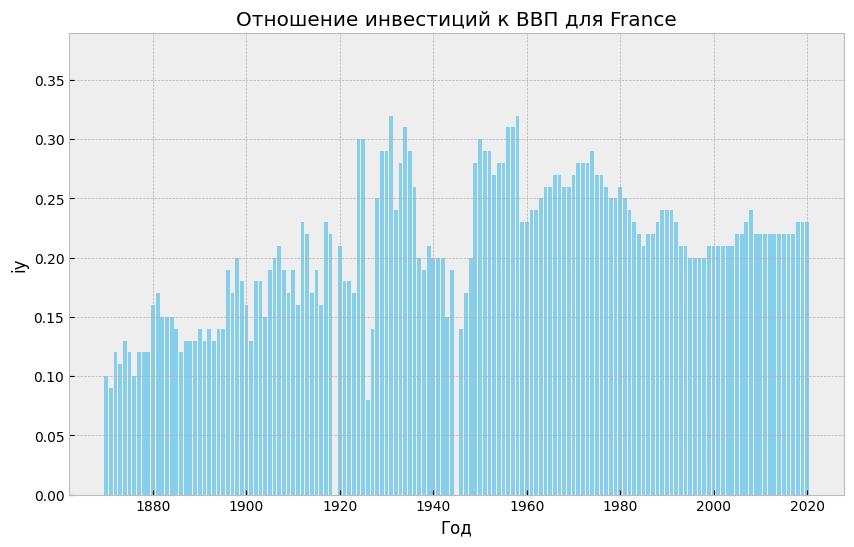

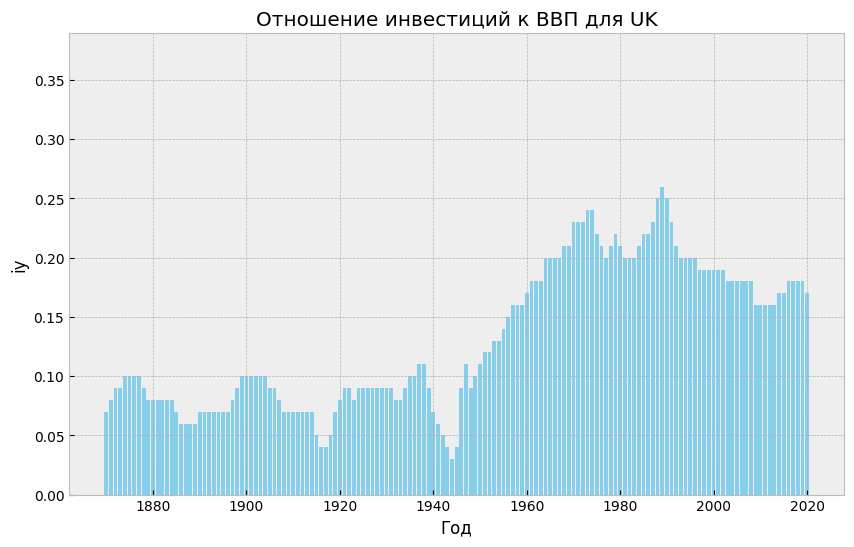

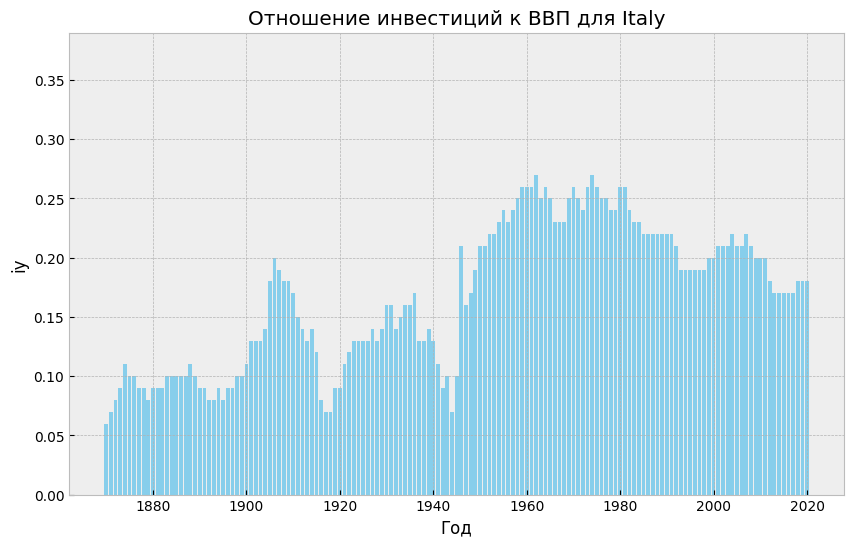

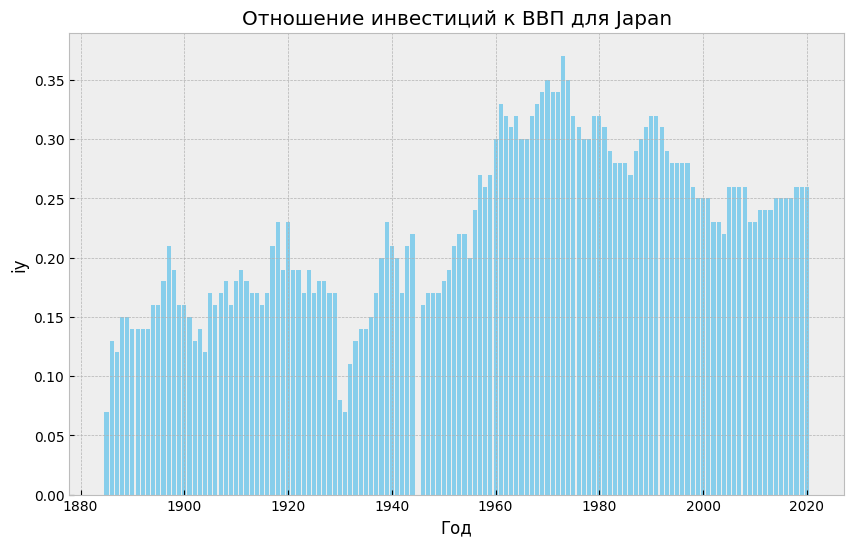

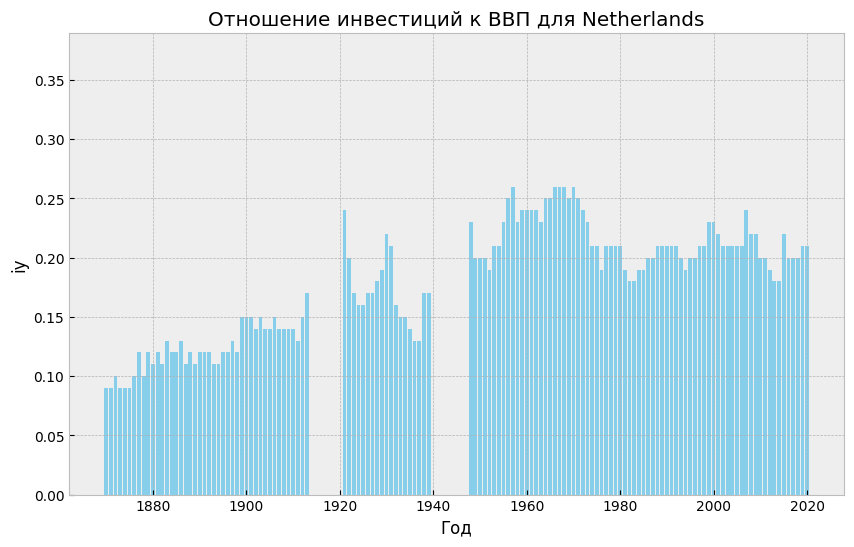

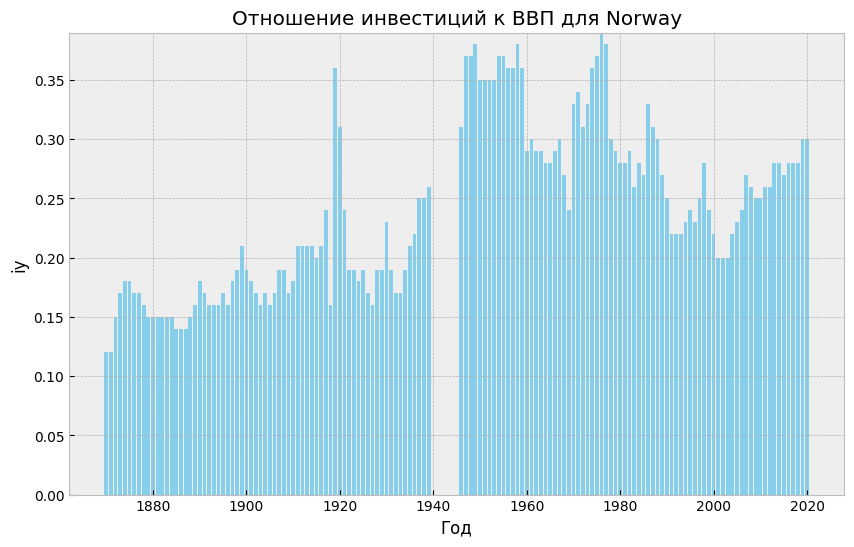

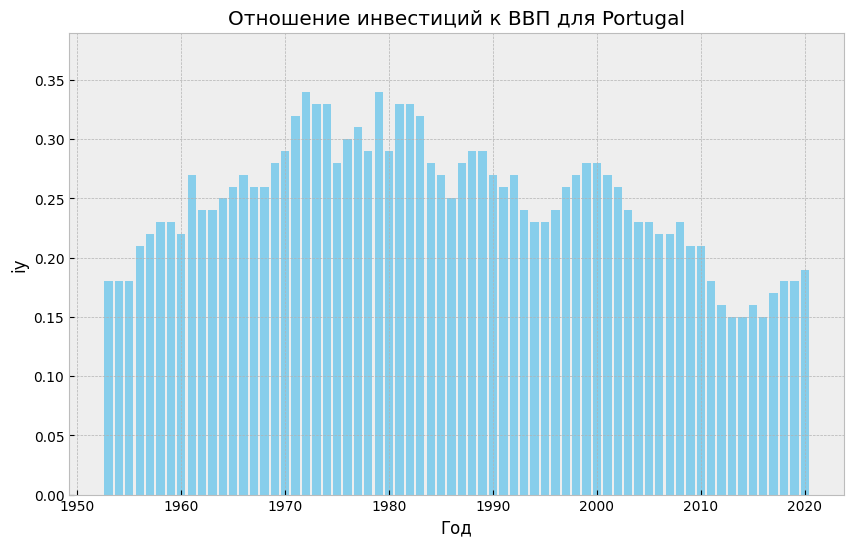

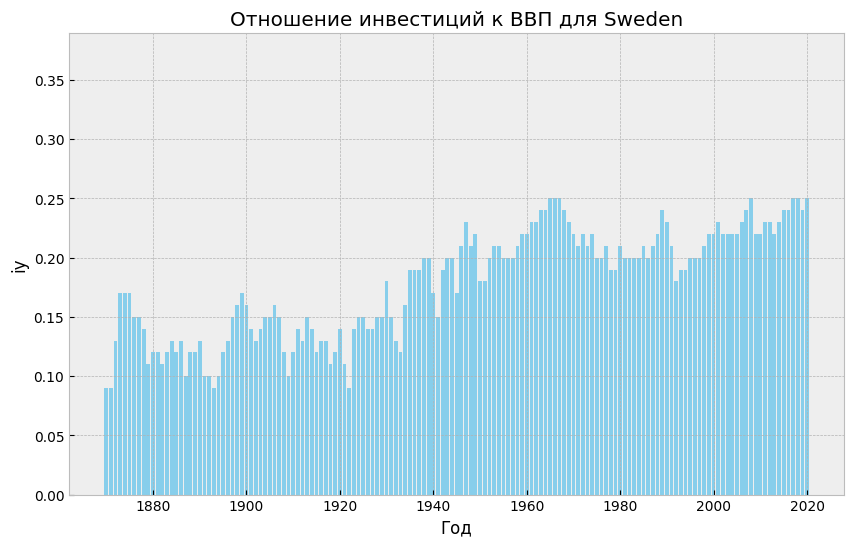

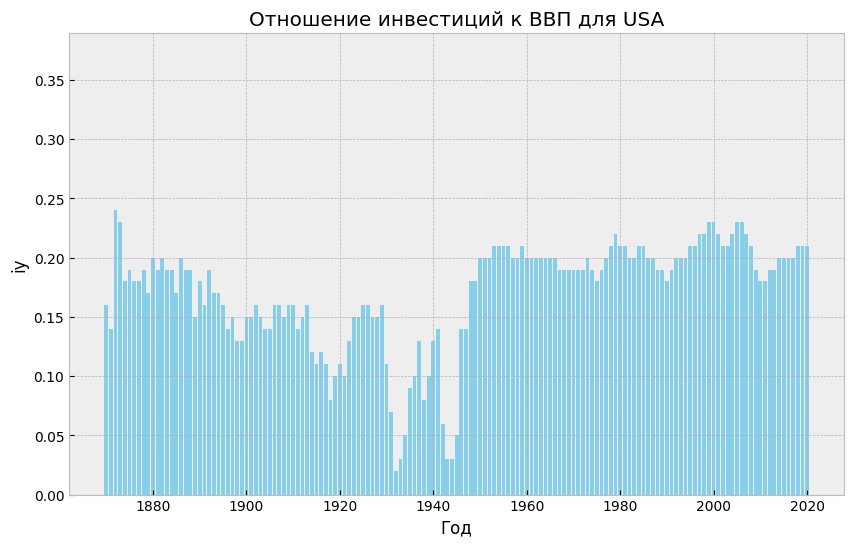

In [9]:
for i in unique_values:
  selected_country = i
  df_selected = train[train['country'] == selected_country]


  plt.figure(figsize=(10, 6))
  plt.bar(df_selected['year'], df_selected['iy'], color='skyblue')
  plt.xlabel('Год')
  plt.ylabel('iy')
  plt.title(f'Отношение инвестиций к ВВП для {selected_country}')
  plt.ylim(0, train['iy'].max()) #делаем так чтобы масштаб по оси ординат был одинаковым для всех графиков
  plt.show()

In [10]:
train = train.drop(columns = ['country', 'peg_type', 'peg_base'])

In [11]:
# train.peg_type.replace({'BASE':0, 'PEG':1, 'FLOAT':2})
# train.peg_base.replace({'GBR':0, 'USA':1, 'DEU':2, 'HYBRID':3, 'NA':4})
# a = train.iloc[:, [37]]
# a

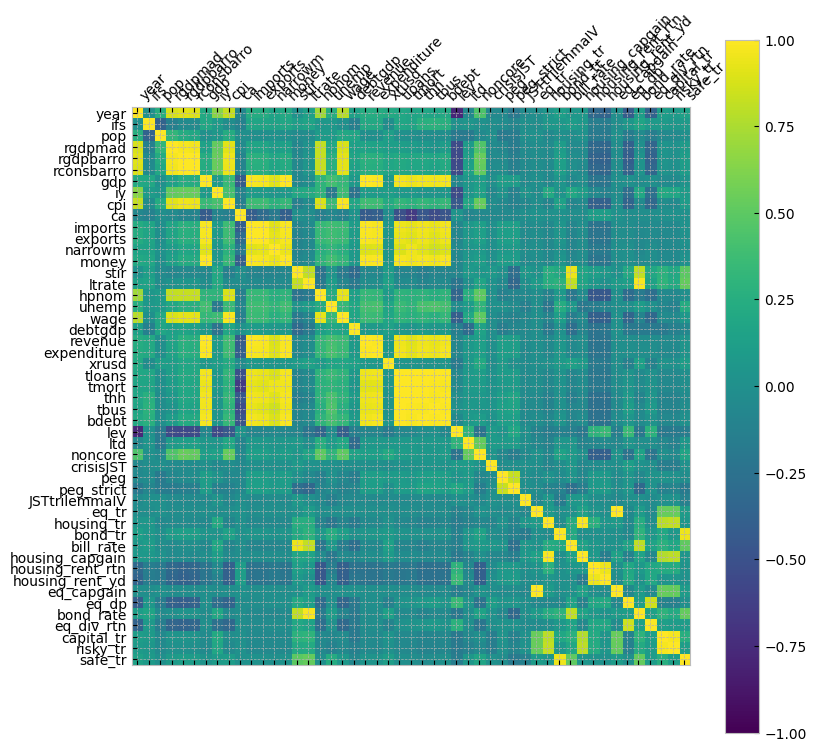

In [12]:
import scipy.stats as ss
# ss.pearsonr(train.Test, train.NameFreq)
fig, ax = plt.subplots(figsize=(9, 9))
img = ax.matshow(train.corr(), vmin=-1, vmax=1)
plt.yticks(range(train.shape[1]), train.columns)
plt.xticks(range(train.shape[1]), train.columns, rotation=45, ha="left" )
plt.colorbar(mappable=img, )
plt.show()

In [13]:
train = train.drop(columns = ['tbus', 'thh', 'tmort', 'revenue', 'imports', 'exports', 'narrowm', 'rconsbarro', 'bond_rate', 'expenditure', 'cpi', 'tloans', 'housing_tr'])

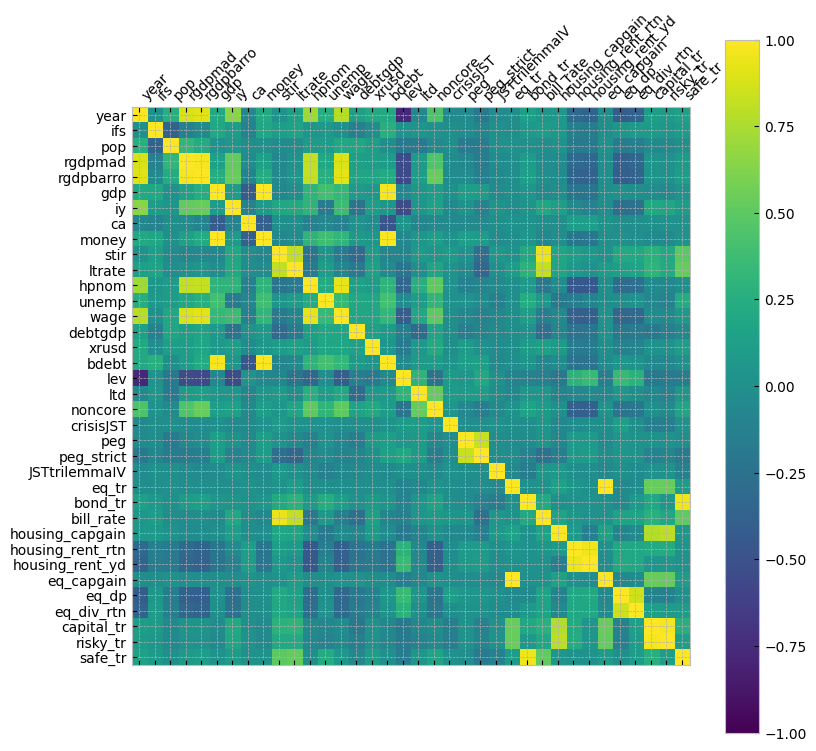

In [14]:
import scipy.stats as ss
# ss.pearsonr(train.Test, train.NameFreq)
fig, ax = plt.subplots(figsize=(9, 9))
img = ax.matshow(train.corr(), vmin=-1, vmax=1)
plt.yticks(range(train.shape[1]), train.columns)
plt.xticks(range(train.shape[1]), train.columns, rotation=45, ha="left" )
plt.colorbar(mappable=img, )
plt.show()

In [15]:
train.isnull().sum()

year                  0
ifs                   0
pop                   0
rgdpmad               0
rgdpbarro             0
gdp                  25
iy                  220
ca                  161
money               150
stir                148
ltrate               36
hpnom               593
unemp               679
wage                 15
debtgdp             177
xrusd                 3
bdebt               775
lev                 214
ltd                 268
noncore             337
crisisJST             0
peg                   0
peg_strict            0
JSTtrilemmaIV       502
eq_tr               304
bond_tr             272
bill_rate           216
housing_capgain     522
housing_rent_rtn    658
housing_rent_yd     646
eq_capgain          397
eq_dp               398
eq_div_rtn          404
capital_tr          737
risky_tr            713
safe_tr             320
dtype: int64

In [16]:
# Необходимо заполнить значения пустых ячеек
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# X = train.loc[train.Age > 0, (train.columns != 'Age') & (train.columns != 'Test')]
# y = train.loc[train.Age > 0, 'Age']

In [17]:
train = train.fillna(train.mean())
train

,year,ifs,pop,rgdpmad,rgdpbarro,gdp,iy,ca,money,stir,...,bill_rate,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,193,1775.00,3273.24,13.84,208.78,0.11,-6.15,54.30,4.88,...,0.05,0.060895,0.054327,0.05191,-0.07,0.07,0.07,0.099273,0.111467,0.051638
1,1871,193,1675.00,3298.51,13.94,211.56,0.10,5.26,59.50,4.60,...,0.05,-0.050000,0.054327,0.05191,0.04,0.07,0.07,0.099273,0.111467,0.051638
2,1872,193,1722.00,3553.43,15.04,227.40,0.13,7.87,68.50,4.60,...,0.05,0.030000,0.054327,0.05191,0.11,0.06,0.07,0.099273,0.111467,0.051638
3,1873,193,1769.00,3823.63,16.22,266.54,0.12,-11.05,73.70,4.40,...,0.04,-0.030000,0.054327,0.05191,0.08,0.06,0.07,0.099273,0.111467,0.051638
4,1874,193,1822.00,3834.80,16.27,287.58,0.14,-5.56,79.30,4.50,...,0.05,0.210000,0.054327,0.05191,0.12,0.06,0.07,0.099273,0.111467,0.051638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,111,322701.25,33012.77,108.76,18695.10,0.20,-397.57,12860.22,0.39,...,0.00,0.060000,0.050000,0.05000,0.01,0.02,0.02,0.050000,0.070000,0.000000
2714,2017,111,324756.94,33543.68,110.59,19479.60,0.20,-361.70,13592.47,1.00,...,0.01,0.060000,0.050000,0.05000,0.17,0.02,0.02,0.120000,0.160000,0.020000
2715,2018,111,326497.13,34338.77,113.31,20527.20,0.21,-438.24,14116.52,1.83,...,0.02,0.070000,0.050000,0.04000,0.12,0.02,0.02,0.090000,0.130000,0.000000
2716,2019,111,328018.68,34961.84,115.23,21372.60,0.21,-472.14,14836.52,2.16,...,0.02,0.040000,0.050000,0.04000,0.06,0.02,0.02,0.080000,0.080000,0.070000


In [18]:
target_variable = 'crisisJST'

X = train.drop(target_variable, axis=1)
y = train[target_variable]

In [19]:
from sklearn.model_selection import train_test_split

train_size = 0.8
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=train_size, random_state=42, shuffle=True)

In [20]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred = lin_reg.predict(X_test)

In [21]:
import statsmodels.api as sm
#add constant to predictor variables
x_train = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              crisisJST   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.093
Method:                 Least Squares   F-statistic:                              7.009
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                    3.65e-31
Time:                        20:10:36   Log-Likelihood:                          672.77
No. Observations:                2053   AIC:                                     -1276.
Df Residuals:                    2018   BIC:                                     -1079.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------